In [1]:
from multiprocessing.dummy import Pool as ThreadPool
import stainNorm_Macenko
import multiprocessing
import os
import cv2
import numpy  as np

global inputPath
global outputPath
global normalizer

In [2]:
inputPath =  r"/mnt/isilon/Lung_HMAR_TCGA/train_Level1/PROVA_ALL"    
outputPath =  r"/mnt/isilon/Lung_HMAR_TCGA/train_Level1/PROVA_norm/"  
sampleImagePath = r"/mnt/isilon/Lung_HMAR_TCGA/train_Level1/PROVA_ALL/PROVA/14B012980_1_T1C_1_1_1408567366368_2_1024-7168-1536-7680_.jpg"

In [3]:
target = cv2.imread(sampleImagePath)

In [4]:
target = cv2.cvtColor(target, cv2.COLOR_BGR2RGB)
normalizer = stainNorm_Macenko.Normalizer()
normalizer.fit(target)  

In [16]:
inputPathContent = os.listdir(inputPath); inputPathContent

['PROVA']

In [18]:
normPathContent = os.listdir(outputPath); normPathContent

[]

In [19]:
    remainlList = []
    for i in inputPathContent:
        if not i in normPathContent:
            remainlList.append(i)
            
    inputPathContent = [i for i in remainlList if not i.endswith('.bat')]
    inputPathContent = [i for i in inputPathContent if not i.endswith('.txt')]
    

In [20]:
remainlList

['PROVA']

In [23]:
inputPathContent

['PROVA']

In [25]:
inputPath

'/mnt/isilon/Lung_HMAR_TCGA/train_Level1/PROVA_ALL'

In [49]:
temp = '/mnt/isilon/Lung_HMAR_TCGA/train_Level1/PROVA_ALL/PROVA'
tempContent = os.listdir(temp)

In [50]:
tempContent = [i for i in tempContent if i.endswith('.png')]

In [51]:
tempContent[1]

'14B012980_1_T1C_1_1_1408567366368_2_10752-8704-11264-9216_.png'

In [52]:
img = cv2.imread(os.path.join(temp, tempContent[1]))

In [53]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 

In [54]:
edge  = cv2.Canny(img, 40, 40) 

In [55]:
import matplotlib.pyplot as plt

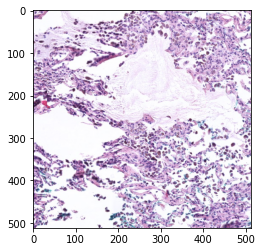

In [56]:
plt.imshow(img)

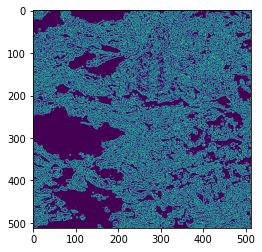

In [57]:
plt.imshow(edge)

In [58]:
edge = edge / np.max(edge)               
edge = (np.sum(np.sum(edge)) / (img.shape[0] *img.shape[1])) * 100
print(edge)

26.697921752929688


In [59]:
nor_img = normalizer.transform(img)

In [60]:
cv2.imwrite(os.path.join(outputPath, tempContent[1]), cv2.cvtColor(nor_img, cv2.COLOR_RGB2BGR))

True